In [5]:
import numpy as np
import librosa
from librosa.display import waveplot
import keras
from keras import Sequential, Model, layers, activations
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [6]:
dir_name_id = ['a', 'b', 'c', 'd', 'e', 'f']
dir_name = './training/training-'

In [7]:
def load_file_names(dir_name, dir_name_id):
    records_normal = {}
    records_abnormal = {}
    for i in dir_name_id:
        file_normal = open(dir_name + i + '/RECORDS-normal')
        file_abnormal = open(dir_name + i + '/RECORDS-abnormal')
        records_normal['training-' + i] = file_normal.read().splitlines()
        records_abnormal['training-' + i] = file_abnormal.read().splitlines()
    
    
    return records_normal, records_abnormal

In [8]:
'''
In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power 
spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel 
scale of frequency.
'''

def extract_mfcc_feature(file_names):
    data = []
    for key in file_names.keys():
        
        for file in file_names[key]:
            audio, sample_rate = librosa.load('./training/' + key + '/' + file + '.wav', res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
            feature = np.array(mfccs).reshape([-1,1])
            data.append(feature)
        
        print(key + ' done')
    
    return data

In [28]:
records_normal, records_abnormal = load_file_names(dir_name, dir_name_id)

In [29]:
normal = np.array(extract_mfcc_feature(records_normal))

training-a done
training-b done
training-c done
training-d done
training-e done
training-f done


In [30]:
abnormal = np.array(extract_mfcc_feature(records_abnormal))

training-a done
training-b done
training-c done
training-d done
training-e done
training-f done


In [31]:
y_normal = np.ones([normal.shape[0]])
y_abnormal = np.zeros([abnormal.shape[0]])

In [32]:
x = np.concatenate((normal, abnormal), axis = 0)
y = np.concatenate((y_normal, y_abnormal), axis = 0)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
def make_model():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=64, recurrent_dropout=0.30, return_sequences=True, input_shape=(40, 1)))
    model.add(keras.layers.LSTM(units=32, recurrent_dropout=0.20, return_sequences=False))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [35]:
model = make_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


Exception ignored in: <bound method Wave_write.__del__ of <wave.Wave_write object at 0x7f018c63acf8>>
Traceback (most recent call last):
  File "/home/kartik/anaconda3/lib/python3.6/wave.py", line 316, in __del__
    self.close()
  File "/home/kartik/anaconda3/lib/python3.6/wave.py", line 434, in close
    self._ensure_header_written(0)
  File "/home/kartik/anaconda3/lib/python3.6/wave.py", line 454, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


In [36]:
model.fit(x_train, y_train, batch_size=32,epochs=100)

Epoch 1/100
2592/2592 [==============================] - 11s 4ms/step - loss: 0.5016 - acc: 0.7735
Epoch 2/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3917 - acc: 0.8164
Epoch 3/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3676 - acc: 0.8410
Epoch 4/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3652 - acc: 0.8391
Epoch 5/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3538 - acc: 0.8345
Epoch 6/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3498 - acc: 0.8430
Epoch 7/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3451 - acc: 0.8434
Epoch 8/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3405 - acc: 0.8457
Epoch 9/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3359 - acc: 0.8457
Epoch 10/100
2592/2592 [==============================] - 7s 3ms/step - loss: 0.3280 - acc: 0.8526
Epoch 11/100
2592/

In [37]:
model.save('model.h5')

In [38]:
model.evaluate(x_test, y_test)

648/648 [==============================] - 1s 1ms/step


[0.25502476077756764, 0.8873456790123457]

In [43]:
audio, sample_rate = librosa.load('./test3.mp3')
mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
feature = np.array(mfccs).reshape([-1,1])

In [44]:
feature = feature.reshape((1,40,1))

In [81]:
model.predict(feature)

array([[0.8922206]], dtype=float32)

In [50]:
model.predict

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [2]:
from keras.models import load_model

In [3]:
my_model = load_model('model.h5')

In [47]:
pred = my_model.predict(feature)

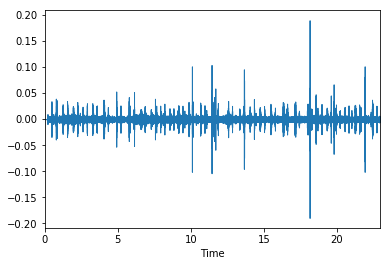

In [62]:
import pylab
# pylab.axis('off') # no axis
# pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
librosa.display.waveplot(audio)
pylab.savefig('img.jpg')

In [51]:
pred[0][0]

0.9769652

In [60]:
# import pylab
pylab.savefig('img.jpg', bbox_inches=None, pad_inches=0)

<Figure size 432x288 with 0 Axes>